In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [24]:
data = pd.read_csv("Iris.csv")
X = data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

Y = data['Species'].values

In [25]:


print(Y)


['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [50]:


def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def precision(y, y_pred):
    # tp = 0
    # fn = 0

    # fp = 0
    # tn = 0

    # for i in range(len(y)):
    #     if y[i] == 1:
    #         if y_pred[i] == 1:
    #             tp += 1
    #         else:
    #             fn += 1
        
    #     else:
    #         if y_pred[i] == 1:
    #             fp += 1
    #         else:
    #             tn += 1

    
    # return [ tp / (tp + fn) , fp / (fp + tn)]

    for label in set(y):
        TP = np.sum((y == label) & (y_pred == label))
        FP = np.sum((y != label) & (y_pred == label))
        FN = np.sum((y == label) & (y_pred != label))

        return TP / (TP + FP) if TP + FP > 0 else 0
    

def recall(y, y_pred):
    # tp = 0
    # fn = 0

    # fp = 0
    # tn = 0

    # for i in range(len(y)):
    #     if y[i] == 1:
    #         if y_pred[i] == 1:
    #             tp += 1
    #         else:
    #             fn += 1
        
    #     else:
    #         if y_pred[i] == 1:
    #             fp += 1
    #         else:
    #             tn += 1

    
    # return [ tp / (tp + fp) , fn / (fn + tn)]
    for label in set(y):
        TP = np.sum((y == label) & (y_pred == label))
        FP = np.sum((y != label) & (y_pred == label))
        FN = np.sum((y == label) & (y_pred != label))

        return TP / (TP + FN) if TP + FN > 0 else 0

def accuracy(y, y_pred):
    return np.mean(y == y_pred)


def knn_predict(X_train, y_train, X_test, k=5):
    preds = []
    for x in X_test:
        d = [euclidean_distance(x, x_train) for x_train in X_train]
        idx = np.argsort(d)[:k]
        # print(idx)
        # print(y_train.shape[0])
        lbls = y_train[idx]
        vals, cnts = np.unique(lbls, return_counts=True)
        preds.append(vals[np.argmax(cnts)])
    return np.array(preds)


In [51]:

def split_data(X, y, train_ratio, val_ratio, test_ratio):
    n = len(y)
    idx = np.random.permutation(n)
    X, y = X[idx], y[idx]
    train_size, val_size = int(train_ratio*n), int(val_ratio*n)
    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
    X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = split_data(X,Y,0.8,0,0.2)


In [64]:
K = []
for _ in range(5):
    K.append(np.random.randint(1,int(np.sqrt(len(y_train)))))

print(K)

[8, 9, 9, 3, 6]


[[0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.6363636363636364, 0.9090909090909091], [1.0, 1.0, 1.0, 1.0, 1.0], [0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.8666666666666667, 0.9666666666666667]]


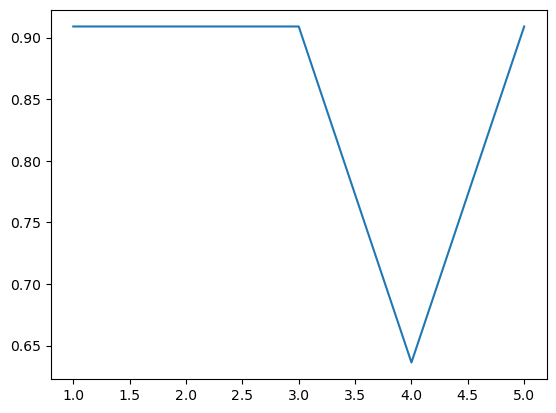

In [85]:
result = []

p = []
r = []
a = []

for k in K:
    y_pred = knn_predict(X_train, y_train, X_test, k)

    # print(precision(y_pred,y_test))
    # print(recall(y_pred,y_test))
    # print(accuracy(y_pred,y_test))

    p.append(precision(y_pred,y_test))
    r.append(recall(y_pred,y_test))
    a.append(accuracy(y_pred,y_test))

result.append(p)
result.append(r)
result.append(a)

plt.plot([1,2,3,4,5] , p)


q = []
q.append(result)

print(result)

df_results = pd.DataFrame(q, columns=["p" , "r" , "a"])
df_results.to_csv(f"result1/1.csv", index=False)

In [57]:
def euclidean_distance(a, b):
    return 1 / (np.sqrt(np.sum((a - b) ** 2)) + 0.001)

def knn_predict(X_train, y_train, X_test, k=5):
    preds = []
    for x in X_test:
        d = [euclidean_distance(x, x_train) for x_train in X_train]
        # print(len(d))
        idx = np.argsort(d)[120-k:-1]
        lbls = y_train[idx]
        vals, cnts = np.unique(lbls, return_counts=True)
        preds.append(vals[np.argmax(cnts)])
    return np.array(preds)

[[0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.6363636363636364, 0.9090909090909091], [1.0, 1.0, 1.0, 1.0, 1.0], [0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.8666666666666667, 0.9666666666666667]]


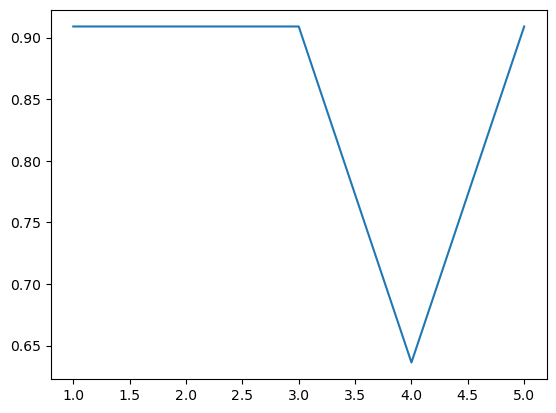

In [86]:
result = []

p = []
r = []
a = []

for k in K:
    y_pred = knn_predict(X_train, y_train, X_test, k)

    # print(precision(y_pred,y_test))
    # print(recall(y_pred,y_test))
    # print(accuracy(y_pred,y_test))

    p.append(precision(y_pred,y_test))
    r.append(recall(y_pred,y_test))
    a.append(accuracy(y_pred,y_test))

result.append(p)
result.append(r)
result.append(a)

plt.plot([1,2,3,4,5] , p)


q = []
q.append(result)

print(result)

df_results = pd.DataFrame(q, columns=["p" , "r" , "a"])
df_results.to_csv(f"result1/2.csv", index=False)

[[0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.6363636363636364, 0.9090909090909091], [1.0, 1.0, 1.0, 1.0, 1.0], [0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.8666666666666667, 0.9666666666666667]]


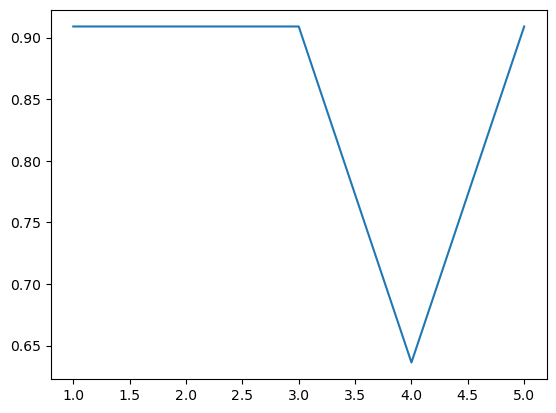

In [87]:
def euclidean_distance(a, b):
    return 1 / (np.sqrt(np.sum((a - b) ** 2))**2 + 0.001)

def knn_predict(X_train, y_train, X_test, k=5):
    preds = []
    for x in X_test:
        d = [euclidean_distance(x, x_train) for x_train in X_train]
        # print(len(d))
        idx = np.argsort(d)[120-k:-1]
        lbls = y_train[idx]
        vals, cnts = np.unique(lbls, return_counts=True)
        preds.append(vals[np.argmax(cnts)])
    return np.array(preds)


result = []

p = []
r = []
a = []

for k in K:
    y_pred = knn_predict(X_train, y_train, X_test, k)

    # print(precision(y_pred,y_test))
    # print(recall(y_pred,y_test))
    # print(accuracy(y_pred,y_test))

    p.append(precision(y_pred,y_test))
    r.append(recall(y_pred,y_test))
    a.append(accuracy(y_pred,y_test))

result.append(p)
result.append(r)
result.append(a)

plt.plot([1,2,3,4,5] , p)


q = []
q.append(result)

print(result)

df_results = pd.DataFrame(q, columns=["p" , "r" , "a"])
df_results.to_csv(f"result1/3.csv", index=False)